Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
plt.style.use('fast')

## Part 1

In [5]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [6]:
# Display categorical pclass as a string
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


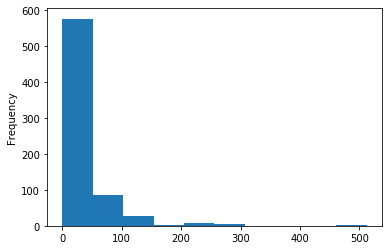

In [7]:
df['Fare'].plot(kind='hist')

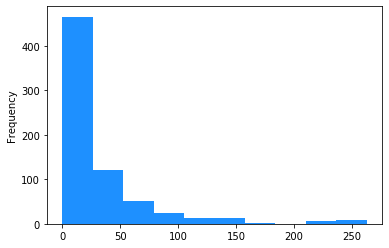

In [9]:
# remove extreme outliers
df = df[df['Fare']< 500]
df['Fare'].plot(kind='hist', color='dodgerblue')

In [10]:
# Use cut to convert continuous to vategorical
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high','vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

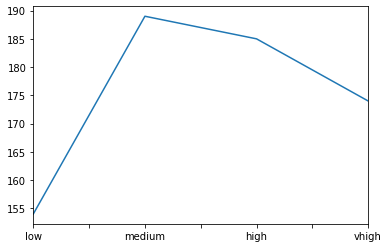

In [12]:
# sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
myresults.plot();


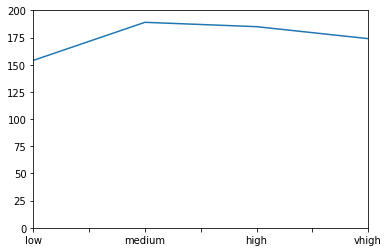

In [13]:
myresults.plot(ylim=(0,200));

## Display a single continuous variable

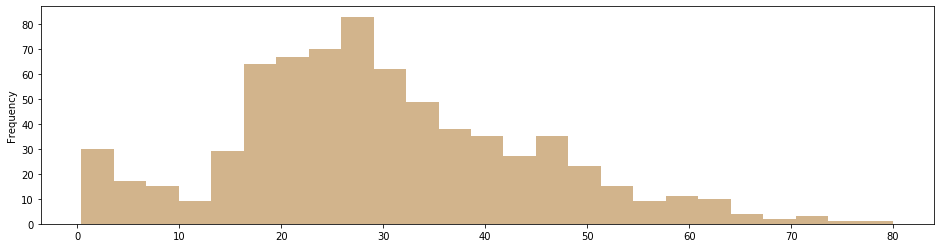

In [14]:
# histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='tan');

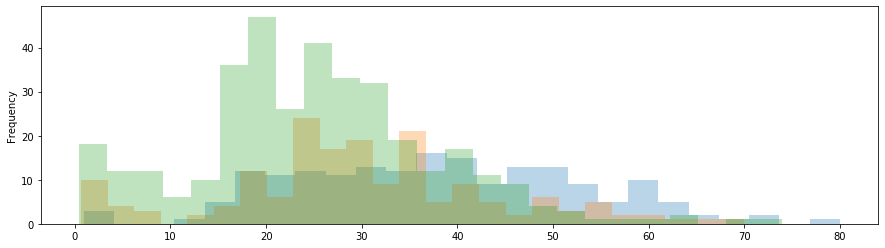

In [16]:
# Stacked histograms

for i in range(1,4):
  df[df['Pclass']==i]['Age'].plot(kind='hist', bins=25, figsize=(15,4), alpha=0.3)

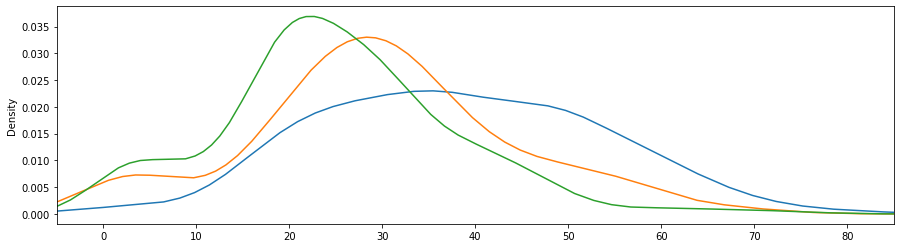

In [19]:
# Easier to read using a KDE graph

for i in range(1,4):
  df[df['Pclass']==i]['Age'].plot(kind='density',xlim=(-5,85), figsize=(15,4))

## Display a single categorical value

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


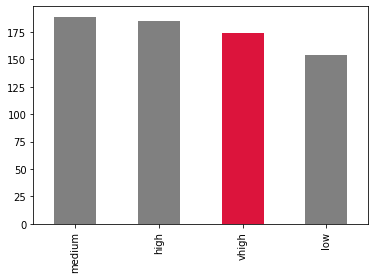

In [22]:
# Use colors in a barchart to make values pop

df['fare_groups'].value_counts().plot(kind='bar', colors = ['crimson' if i == 2 else 'gray' for i in range(0, 4)])

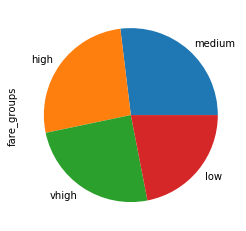

In [24]:
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4))

In [25]:
# Crosstab

cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


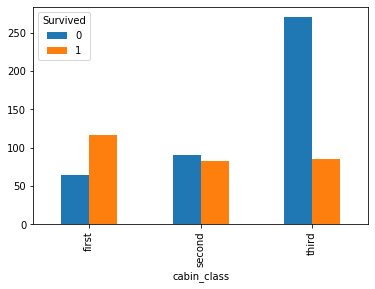

In [26]:
cab_death.plot(kind='bar')

In [27]:
# Crosstab with column percents.
cab_death1 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


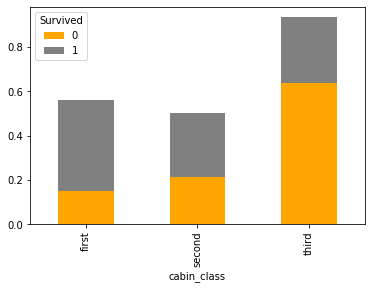

In [28]:
# make a stacked bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [29]:
# Crosstab with row percents.
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


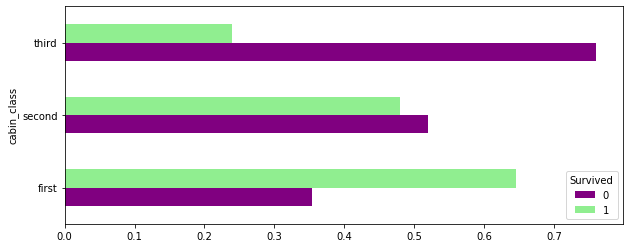

In [30]:
# A paired barchart for comparison of two categorical variables. Note the use of 'barh'.
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

In [32]:
# Single continuous variable
df['Age'].mean()

29.618011283497882

In [36]:
# Continuous Variable broken up by category
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

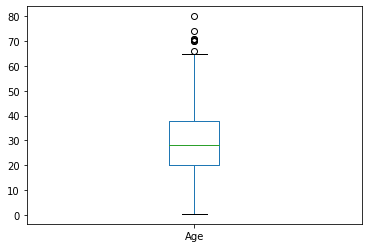

In [37]:
df['Age'].plot(kind='box')

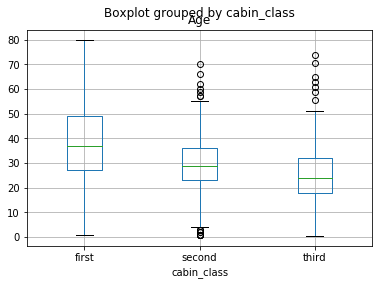

In [38]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
df.boxplot(column='Age', by='cabin_class');

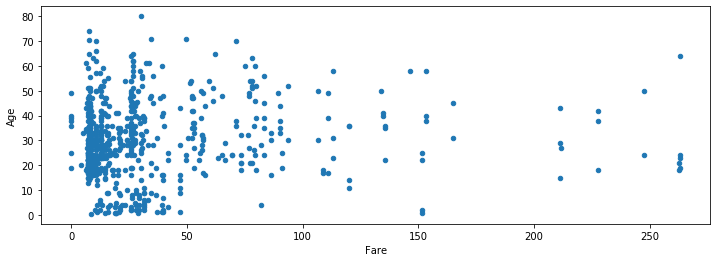

In [39]:
# Two continuous variables: age by fare
df.plot(kind = 'scatter', x='Fare', y='Age', figsize=(12,4));

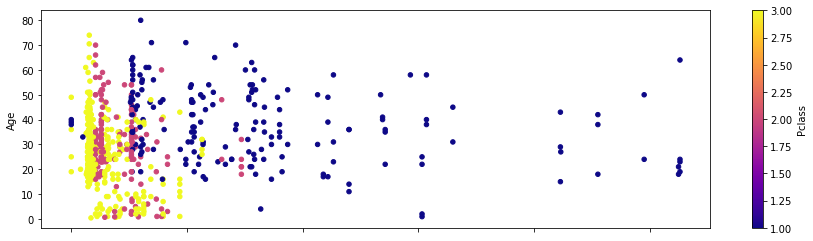

In [41]:
# Add a third dimension of color
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

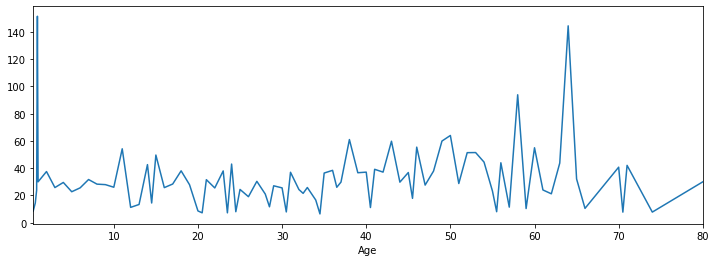

In [42]:
# line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

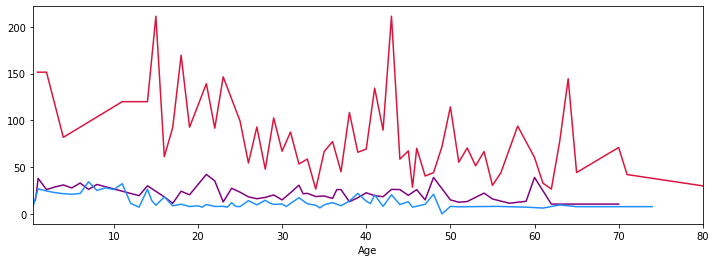

In [44]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
for x in [1,2,3]:
    df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

## Compare multiple continous variables

In [45]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


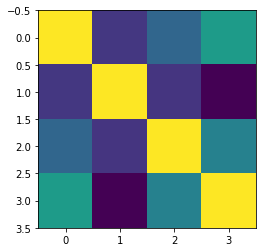

In [47]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

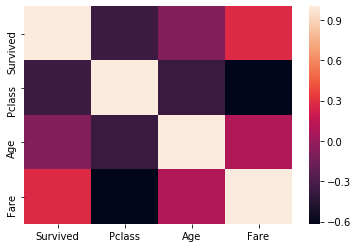

In [49]:
# using seaborn
sns.heatmap(corr_matrix);

## Intro to matplotlib

In [0]:
x = np.linspace(0, 5, 11)
y = x ** 2

In [51]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [52]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

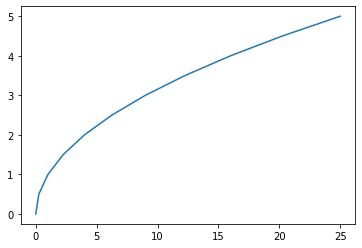

In [53]:
plt.plot(y,x)

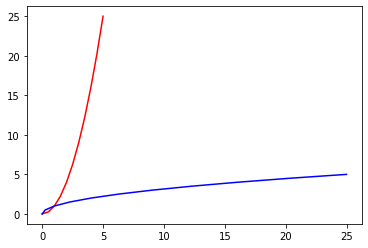

In [54]:
# You can have two 'plt' plots together (and let's add some color).
plt.plot(x, y, 'r') 
plt.plot(y, x, 'b');

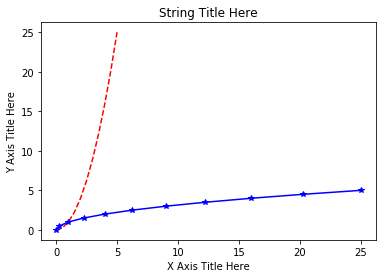

In [55]:
plt.plot(x, y, 'r--') 
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

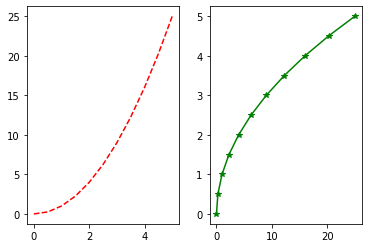

In [56]:
## Creating multiplots on the same Canvas
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here